In [11]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from itertools import product
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import files
data=files.upload()

Saving ETH-USDD.csv to ETH-USDD (1).csv


In [35]:
data = pd.read_csv("ETH-USDD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
1,2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2,2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
3,2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
4,2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
...,...,...,...,...,...,...,...
1973,2023-05-28,1831.098633,1915.723267,1825.467285,1910.914185,1910.914185,6359610561
1974,2023-05-29,1909.297485,1926.421753,1879.077515,1893.078125,1893.078125,5884674572
1975,2023-05-30,1893.093140,1916.574951,1883.934692,1901.026611,1901.026611,5363439784
1976,2023-05-31,1901.098267,1907.035400,1852.094727,1874.130493,1874.130493,5984512548


In [36]:
# Thống kê mô tả dữ liệu
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1.978000e+03
mean,1189.934464,1226.228035,1149.093067,1190.278103,1190.278103,1.282514e+10
std,1164.398656,1199.407690,1124.313131,1164.001636,1164.001636,1.047418e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,9.484880e+08
25%,217.387363,222.335430,209.679841,217.188000,217.188000,5.483779e+09
50%,644.022003,671.301911,623.024719,644.950470,644.950470,1.034187e+10
75%,1819.370240,1849.796387,1776.863282,1819.169739,1819.169739,1.773631e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [37]:
# 2. Gắn index với giá Close
data1 = data.reset_index()['Close']

In [38]:
# Chia train test theo tỉ lệ 7:2:1
train_size = int(0.7 * len(data1))
test_size = int(0.2 * len(data1))
val_size = len(data1) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [45]:
# Convert train_data to numpy array
y_train = np.array(data['Close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add', seasonal='add')
fit_model = model.fit()


# Make predictions for test_data and validate_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])
validate_predictions = fit_model.predict(start=val_data.index[0], end=val_data.index[-1])

#print("Test Predictions:", test_predictions)
#print("Validate Predictions:", validate_predictions)

# Make predictions for the next 30 days
future_predictions = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
print("Future Predictions:", future_predictions)

Future Predictions: [1867.49664813 1854.69780271 1856.79370024 1852.52253587 1865.44544802
 1861.37588495 1868.20502115 1871.00814762 1858.2093022  1860.30519973
 1856.03403536 1868.95694752 1864.88738445 1871.71652065 1874.51964712
 1861.7208017  1863.81669923 1859.54553486 1872.46844701 1868.39888394
 1875.22802014 1878.03114661 1865.23230119 1867.32819872 1863.05703435
 1875.97994651 1871.91038344 1878.73951964 1881.54264611 1868.74380069]


In [46]:
# Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((validate_predictions - val_data['Close'])**2))
test_rmse = np.sqrt(np.mean((test_predictions - test_data['Close'])**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 44.46701333983843
Testing RMSE: 112.10431161951284


In [47]:
# Đánh giá độ chính xác thuật toán bằng MAE
valid_mae = np.mean(np.abs(validate_predictions - val_data['Close']))
test_mae = np.mean(np.abs(test_predictions - test_data['Close']))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 32.76272957326769
Testing MAE: 83.13816279229128


In [48]:
# Đánh giá độ chính xác thuật toán bằng MAPE
valid_mape = np.mean(np.abs((validate_predictions - val_data['Close']) / val_data['Close'])) * 100
test_mape = np.mean(np.abs((test_predictions - test_data['Close']) / test_data['Close'])) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 2.079792254294677
Testing MAPE: 3.5439283878809826


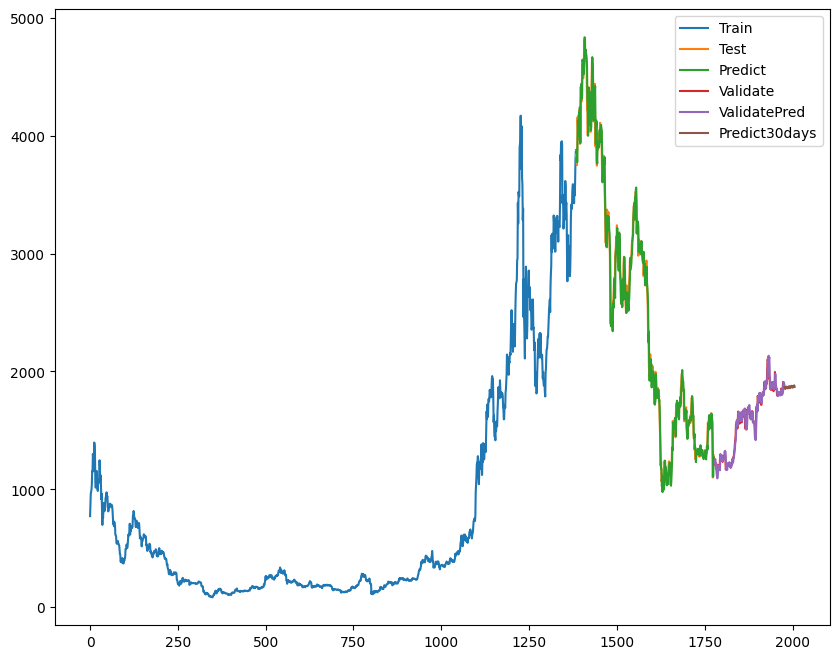

In [49]:
# Vẽ hình
plt.figure(figsize=(10,8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['Close'])
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,test_data['Close'])
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_predictions))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,val_data['Close'])
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, validate_predictions)
predict_data_index = pd.RangeIndex(start=len(data)-1, stop=len(data)+29, step=1)
plt.plot(predict_data_index, future_predictions)
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()